

# Multiple Linear Regression

Tiempo estimado: **20** minutes

## Objectivos


After completing this lab you will be able to:

* Use scikit-learn para implementar la regresión lineal múltiple
* Cree un modelo, entrénelo, pruébelo y use el modelo


Comprender los datos

Lectura de los datos
Modelo de regresión múltiple
Predicción
Práctica

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Descargar data


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-05-07 20:57:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2022-05-07 20:57:14 (1.37 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]





### `FuelConsumption.csv`:

 [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.shape

(1067, 13)

Seleccionar caracteristicas para regresión


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(17)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


Let's plot Emission values with respect to Engine size:


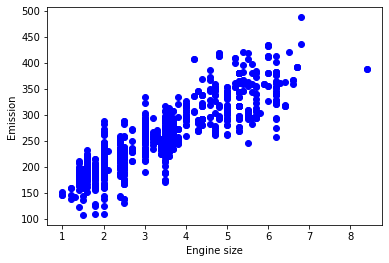

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

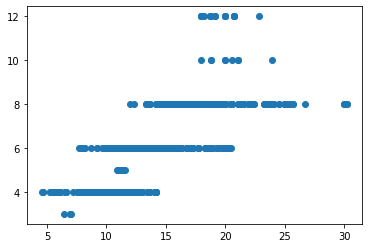

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CYLINDERS)

Train/Test Split implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba.
Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien generaliza nuestro modelo en nuevos datos.

¡Conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, por lo que es excelente para probar! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Alrededor del 80 % de todo el conjunto de datos se utilizará para entrenamiento y el 20 % para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función **np.random.rand()**:


In [12]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

Entrenar distribución de data


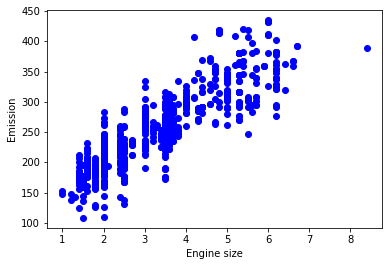

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


En realidad, existen múltiples variables que impactan en la emisión de Co2. Cuando está presente más de una variable independiente, el proceso se denomina regresión lineal múltiple. Un ejemplo de regresión lineal múltiple es la predicción de co2emisiones utilizando las características FUELCONSUMPTION_COMB, EngineSize y Cylinders of cars. Lo bueno aquí es que el modelo de regresión lineal múltiple es la extensión del modelo de regresión lineal simple.

  CO2EMISSION=ENGINESIZE(CX1)+ CYLINDERS(CX2) + FUELCONSUMBTION_COMB CX3 + E

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.54787988  7.8140088   9.50968692]]


In [15]:
# ingresaar al dataframe sin el numpy
x=df['CO2EMISSIONS','CYLINDERS']
Y=df['FUELCONSUMPTION_CITY']

KeyError: ignored

Como se mencionó anteriormente, **Coeficiente** e **Intersección** son los parámetros de la línea ajustada.
Dado que es un modelo de regresión lineal múltiple con 3 parámetros y que los parámetros son la intersección y los coeficientes del hiperplano, sklearn puede estimarlos a partir de nuestros datos. Scikit-learn utiliza el método simple de mínimos cuadrados ordinarios para resolver este problema.
#### Ordinary Least Squares (OLS)
OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable dependiente objetivo y las predichas por la función lineal. En otras palabras, intenta minimizar la suma de los errores cuadráticos (SSE) o el error cuadrático medio (MSE) entre la variable objetivo (y) y nuestra salida pronosticada ($\hat{y}$) en todas las muestras del conjunto de datos.

OLS puede encontrar los mejores parámetros utilizando los siguientes métodos:

* Resolviendo los parámetros del modelo analíticamente usando ecuaciones de forma cerrada
* Utilizando un algoritmo de optimización (Gradient Descent, Stochastic Gradient Descent, Método de Newton, etc.)


<h2 id="prediction">Prediction</h2>


In [17]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 512.39
Variance score: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [21]:
df.tail(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [23]:
#['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']

X_predict = [[3.2, 4,11.8]]


y_result = regr.predict(X_predict)
print("X=%s, Las emisiones de CO2 son: Predicted=%s " % (X_predict[0], y_result[0]))

X=[3.2, 4, 11.8], Las emisiones de CO2 son: Predicted=[242.1167985] 


**Explained variance regression score:**\
Sea $\hat{y}$sea la salida objetivo estimada, y la salida objetivo correspondiente (correcta), y Var sea la varianza (el cuadrado de la desviación estándar). Entonces la varianza explicada se estima de la siguiente manera:
$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\

La mejor puntuación posible es 1,0, los valores más bajos son peores.


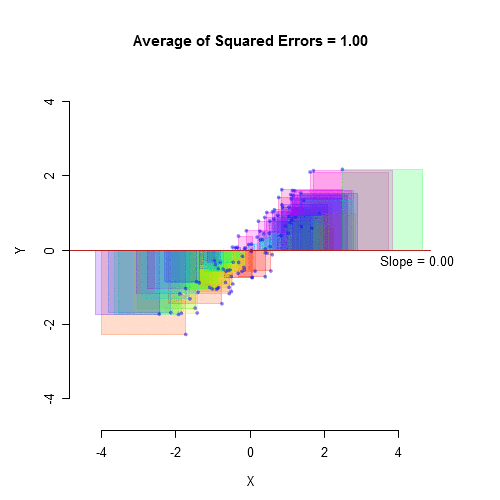

<h2 id="practica">Practice</h2>
Intente usar una regresión lineal múltiple con el mismo conjunto de datos, pero esta vez use __CONSUMO DE COMBUSTIBLE en CIUDAD__ y
__CONSUMO DE COMBUSTIBLE en HWY__ en lugar de FUELCONSUMPTION_COMB. ¿Resulta en una mejor precisión?

In [ ]:
# write your code here



<details><summary>Click here for the solution</summary>

```python
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

```

</details>
